# Analysis of School Ground Greenspace across West Sussex, UK

In [1]:
import os
import overpy

import geopandas as gpd
from geopandas.tools import overlay

import shapely.geometry as geometry
from shapely.ops import linemerge, unary_union, polygonize

### _Parse response from overpass query into GeoDataFrame object_

In [2]:
# define repo name and get root working directory
repo = 'overpass-api'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\crwil\\Documents\\GitHub\\overpass-api'

In [3]:
# add repo source + notebooks directory to system path
import sys
sys.path.insert(0, os.path.join( root_path, 'src' ) )
sys.path.insert(0, os.path.join( root_path, 'notebooks' ) )

In [4]:
# create client object
from client import Client
obj = Client()

### _Retrieve OSM school amenity and building polygons inside bounding box_

In [5]:
# aoi encompassing sussex county
bbox = (50.72222,-0.9575,51.16722,0.04527778)

In [6]:
# get amenity / building features labelled school
df = { 'amenity' : obj.getWaysInBoundingBox( 'amenity', bbox, value='school', tags=['name','addr:postcode'] ),
       'building' : obj.getWaysInBoundingBox( 'building', bbox, value='school', tags=['name','addr:postcode'] ) }

### _Simple analytics based on spatial attributes of school grounds / buildings_

In [7]:
# compute difference between amenity and building features
df[ 'grounds' ] = overlay( df[ 'amenity' ], df[ 'building' ], how='difference' )

In [8]:
# crs to UK national grid (metres)
for key in [ 'amenity', 'building', 'grounds' ]:
    
    df[ key ] = df[ key ].to_crs( 27700 )
    
    # add polygon area / perimeter columns
    df[ key ][ 'area' ] = df[ key ][ 'geometry' ].area
    df[ key ][ 'perimeter' ] = df[ key ][ 'geometry' ].length

In [9]:
# display 25 largest school grounds
df[ 'grounds' ].sort_values( 'area', ascending=False ).head(25)

,id,geometry,name,addr:postcode,area,perimeter
255,314916357,"POLYGON ((505575.551 140387.349, 505605.077 14...",Cranleigh School,GU6 8QQ,506411.606890,6328.435746
175,168362398,"POLYGON ((519704.815 106347.618, 519682.281 10...",Lancing College,BN15 0RW,456238.455368,3205.119246
187,170302233,"POLYGON ((473886.496 125322.486, 473951.713 12...",Bedales Schools,GU32 2DG,405907.014152,6714.374232
222,227489222,"POLYGON ((488575.218 105489.062, 488602.212 10...",Westbourne House School,PO20 2BH,233501.424712,1976.286403
254,313763214,"MULTIPOLYGON (((505678.041 140060.434, 505687....",Cranleigh Preparatory School,GU6 8QH,216185.738381,3736.882805
167,164938607,"POLYGON ((493877.273 109388.028, 493881.386 10...",Great Ballard School,PO18 0LR,206916.243742,2315.143469
363,447262338,"POLYGON ((540478.924 128247.238, 540474.033 12...",Cumnor House School,RH17 7HT,188032.613970,3400.505471
221,226699636,"POLYGON ((535487.986 102889.771, 535457.513 10...",Roedean School,BN2 5RQ,186579.341272,2103.918219
355,440994526,"POLYGON ((485397.152 130635.178, 485396.968 13...",Highfield and Brookham Schools,GU30 7LQ,182319.607880,2931.236034
469,676324975,"POLYGON ((494728.164 138330.007, 494735.880 13...",King Edward's School,GU8 5SG,181865.478329,4434.632974


In [10]:
# display 25 smallest school grounds
df[ 'grounds' ].sort_values( 'area', ascending=True ).head(25)

,id,geometry,name,addr:postcode,area,perimeter
290,389851361,"POLYGON ((531214.317 106302.844, 531223.823 10...",Brighton & Hove Montessori School,BN1 6FB,238.000541,121.451058
426,455544161,"POLYGON ((527695.899 105641.089, 527680.700 10...",The Lioncare School,BN3 5HD,303.058962,70.311824
380,453763836,"POLYGON ((517591.572 116024.820, 517545.460 11...",None,None,330.382806,222.828600
454,499506677,"POLYGON ((541146.153 109987.179, 541146.165 10...",Lewes Old Grammar School,BN7 1XS,359.028647,263.047992
176,170009000,"POLYGON ((484497.984 127753.807, 484517.948 12...",Hollycombe Primary School,GU30 7LY,502.730555,90.269696
62,71729741,"POLYGON ((500681.951 113359.170, 500706.866 11...",Bury C.E. (Aided) Primary School,RH20 1HB,558.146850,110.501263
216,219050936,"POLYGON ((533413.884 104538.566, 533423.087 10...",Roundabout Nursery,BN2 5FL,726.089865,138.982394
234,237098276,"POLYGON ((526780.476 105171.836, 526754.361 10...",Deepdene School,BN3 4ED,767.866341,293.830583
455,499506678,"MULTIPOLYGON (((541184.727 110007.676, 541184....",Lewes Old Grammar School,None,833.389108,268.633945
109,112344272,"POLYGON ((539545.244 108310.359, 539521.909 10...",None,None,890.799291,155.058718


### _Visualise school amenity and building locations based on postcode_

In [11]:
import contextily as cx

def getPostcodeMap( df, match, title=None ):

    subset = { 'amenity' : df[ 'amenity' ][ df[ 'amenity' ]['addr:postcode'].str.contains(match)==True] }

    xmin, ymin, xmax, ymax = subset[ 'amenity' ].total_bounds
    subset[ 'building' ] = df[ 'building' ].cx[xmin:xmax, ymin:ymax]

    for key in [ 'amenity', 'building' ]:
        subset[ key ] = subset[ key ].to_crs(epsg=3857)

    ax = subset[ 'amenity' ].plot(figsize=(20, 10), alpha=0.5, color='r', edgecolor='k')
    subset[ 'building' ].plot( ax=ax, alpha=0.8, color='b', edgecolor='k')
    cx.add_basemap(ax)
    ax.set_title( title )
    
    return

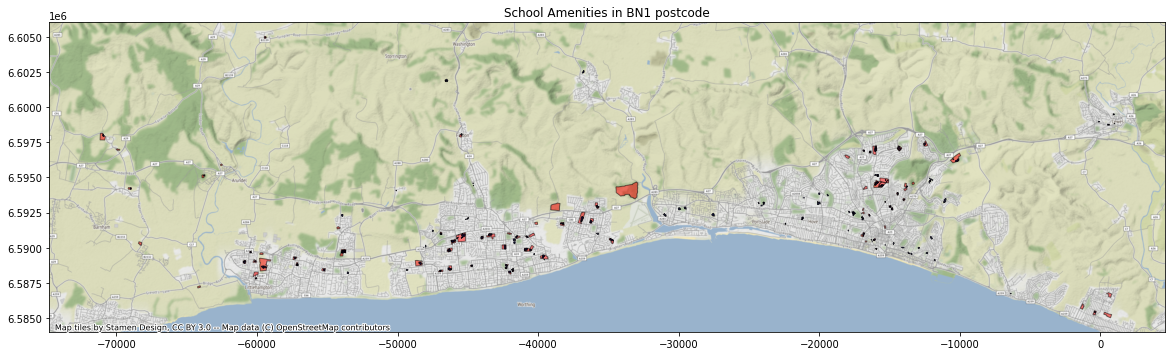

In [12]:
getPostcodeMap( df, 'BN1', title='School Amenities in BN1 postcode' )

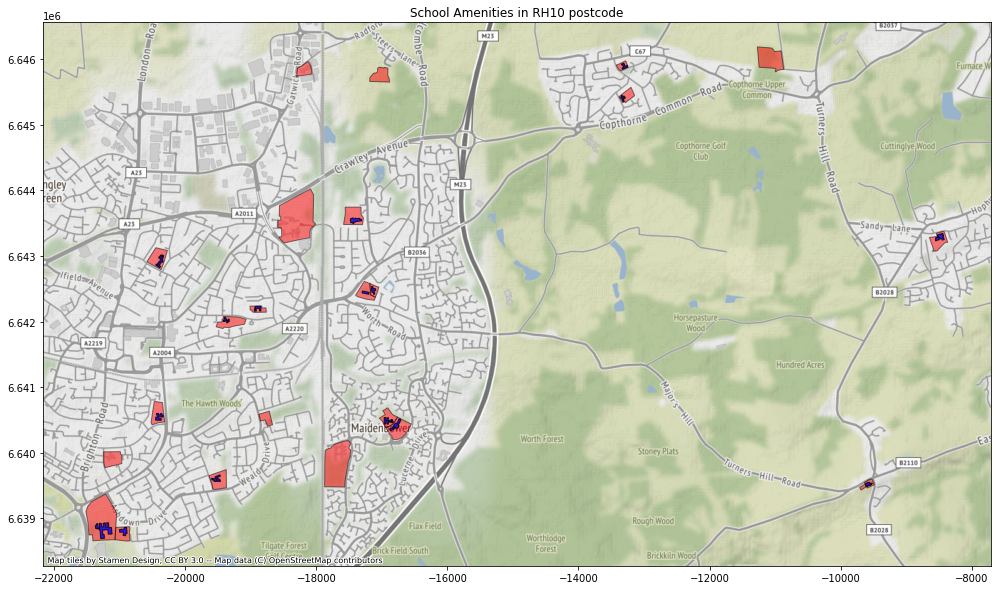

In [13]:
getPostcodeMap( df, 'RH10', title='School Amenities in RH10 postcode' )

### _Assign CORINE land cover classification labels to school amenity polygons_

In [14]:
# load uk corine dataset
path = os.path.join( os.getcwd(), 'data' )
df_corine = gpd.read_file( os.path.join( path, 'clc2018_uk.shp' ) )
df_corine = df_corine.to_crs( 27700 )

# drop polygons outside aoi
x_min, y_min, x_max, y_max = df[ 'amenity' ].total_bounds
df_corine = df_corine.cx[ x_min: x_max, y_min : y_max ]

# reset index
df_corine.reset_index(drop=True, inplace=True)
df_corine.head(5)

,OBJECTID_1,OBJECTID,Shape_Leng,ID,CODE_18,Area_Ha,Remark,Shape_Le_1,Shape_Le_2,Shape_Area,geometry
0,3499,0,0.0,UK_13,111,67.482045,None,4321.031614,4321.031614,6.748204e+05,"POLYGON ((494011.025 99841.619, 493981.058 997..."
1,3501,0,0.0,UK_15,111,46.555644,None,3473.132111,3473.132111,4.655564e+05,"POLYGON ((502455.510 102214.922, 502568.094 10..."
2,3502,0,0.0,UK_16,111,96.161164,None,5567.749898,5567.749898,9.616116e+05,"POLYGON ((515121.572 103351.579, 515092.022 10..."
3,3503,0,0.0,UK_17,111,244.121057,None,12838.812041,12838.812041,2.441211e+06,"POLYGON ((530962.563 105397.427, 531033.869 10..."
4,3507,0,0.0,UK_21,111,64.614847,None,5841.401761,5841.401761,6.461485e+05,"POLYGON ((533647.384 124894.608, 533706.275 12..."


In [15]:
# initialise corine lcc lut
corine_lut = { '111' : 'Continuous Urban Fabric',
               '112' : 'Discontinuous Urban Fabric',
               '113' : 'Diffuse Constructions',
               '121' : 'Industrial Units',
               '122' : 'Road and Rail Networks',
               '123' : 'Port Areas',
               '124' : 'Airports',
               '131' : 'Mineral Extraction Sites',
               '132' : 'Dump Sites',
               '133' : 'Construction Sites',
               '141' : 'Green Urban Sites',
               '142' : 'Sport and Leisure Facilities',
               '211' : 'Arable Land',
               '212' : 'Arable Land',
               '213' : 'Rice Fields',
               '214' : 'Greenhouses',
               '221' : 'Vineyards',
               '222' : 'Fruit Tree Plantations',
               '223' : 'Olive Groves',
               '224' : 'Lavender',
               '231' : 'Pastures',
               '241' : 'Annual crops',
               '242' : 'Complex Cultivation Patterns',
               '243' : 'Agriculture + Natural Vegetation',
               '244' : 'Agroforestry',
               '311' : 'Broad-leaved Forest',
               '312' : 'Coniferous Forest',
               '313' : 'Mixed Forest',
               '321' : 'Natural Grassland',
               '322' : 'Moors and Heathland',
               '323' : 'Vegetation',
               '324' : 'Woodland Scrub',
               '325' : 'Moorland'                         
}

In [16]:
import pandas as pd

# take 25 largest school amenities
df_subset = df[ 'grounds' ].sort_values( 'area', ascending=False )
df_subset = df_subset[ : 25 ]

# find corine polygons overlapping / contained with amenity polygons
records = []
for row in df_subset.itertuples():
    
    df_overlap = df_corine[ ( df_corine['geometry'].contains( row.geometry )==True ) | 
                              ( df_corine['geometry'].overlaps( row.geometry )==True ) ] 
    
    # compute percentage overlap
    percent_overlap = []
    for overlap in df_overlap.itertuples():            
        percent_overlap.append( row.geometry.intersection( overlap.geometry ).area / row.geometry.area * 100.0 )

    # summation across grouped corine codes
    df_overlap = df_overlap.assign( percent_overlap=pd.Series( percent_overlap ).values )
    df_overlap = df_overlap.groupby(['CODE_18'], as_index=False)['percent_overlap'].sum()
    df_overlap = df_overlap.sort_values( by=['CODE_18'] )
    
    # summation across grouped corine codes
    d = dict.fromkeys( corine_lut.values(), float( 0.0 ) )
    for item in df_overlap.to_dict('records'):
        name = corine_lut[ item[ 'CODE_18' ] ]
        d[ name ] = item[ 'percent_overlap' ]
        
    records.append( d )

In [17]:
# convert records to dataframe
df_final = pd.DataFrame( records )
df_final.insert( 0, 'name', df_subset[ 'name' ].values )
df_final.insert( 1, 'postcode', df_subset[ 'addr:postcode' ].values )
df_final.insert( 2, 'area', df_subset[ 'geometry' ].values.area )

df_final[ 'geometry' ] = df_subset[ 'geometry' ].values

In [18]:
df_final

,name,postcode,area,Continuous Urban Fabric,Discontinuous Urban Fabric,Diffuse Constructions,Industrial Units,Road and Rail Networks,Port Areas,Airports,...,Agroforestry,Broad-leaved Forest,Coniferous Forest,Mixed Forest,Natural Grassland,Moors and Heathland,Vegetation,Woodland Scrub,Moorland,geometry
0,Cranleigh School,GU6 8QQ,506411.606890,0.0,31.028535,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"POLYGON ((505575.551 140387.349, 505605.077 14..."
1,Lancing College,BN15 0RW,456238.455368,0.0,0.000000,0.0,79.665367,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"POLYGON ((519704.815 106347.618, 519682.281 10..."
2,Bedales Schools,GU32 2DG,405907.014152,0.0,48.341534,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"POLYGON ((473886.496 125322.486, 473951.713 12..."
3,Westbourne House School,PO20 2BH,233501.424712,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"POLYGON ((488575.218 105489.062, 488602.212 10..."
4,Cranleigh Preparatory School,GU6 8QH,216185.738381,0.0,6.224564,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((505678.041 140060.434, 505687...."
5,Great Ballard School,PO18 0LR,206916.243742,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,79.755039,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"POLYGON ((493877.273 109388.028, 493881.386 10..."
6,Cumnor House School,RH17 7HT,188032.613970,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,3.679608,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"POLYGON ((540478.924 128247.238, 540474.033 12..."
7,Roedean School,BN2 5RQ,186579.341272,0.0,86.431586,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"POLYGON ((535487.986 102889.771, 535457.513 10..."
8,Highfield and Brookham Schools,GU30 7LQ,182319.607880,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,8.611965,0.0,0.0,0.0,0.0,0.0,"POLYGON ((485397.152 130635.178, 485396.968 13..."
9,King Edward's School,GU8 5SG,181865.478329,0.0,49.346842,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,3.754349,0.0,0.0,0.0,0.0,0.0,"POLYGON ((494728.164 138330.007, 494735.880 13..."


In [19]:
df_final.to_csv( 'schools.csv' )